# Laboratorio 3: Modelos lineales

Integrantes: Adolfo Rojas Valenzuela, Emilia Chávez Salamanca


## Instrucciones

1.  Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2.  Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda.

3.  Para cada pregunta **incluya el código fuente que utilizó para llegar a su respuesta. Respuestas sin código no recibirán puntaje.**.

4.  El formato de entrega para esta actividad es un archivo **html**. **Genere un archivo HTML usando Jupyter** y súbalo a U-Cursos. Basta con que un/a integrante haga la entrega. Si ambos/as hacen una entrega en U-Cursos, se revisará cualquiera de éstas.


#### **Se recomienda fuertemente que no usen ChatGPT para resolver la actividad, ya que la experiencia de aprendizaje es mucho mayor si lo hacen por su cuenta.**

In [16]:
%matplotlib inline

## Dataset sintético

Simulamos un dataset con datos aleatorios, siguiendo una distribución uniforme $\mathcal{U}_{(0,1)}$.

In [17]:
from numpy import random
n = 1000
X = random.rand(n, 2)
X[:5]

array([[0.80086256, 0.10638697],
       [0.35339126, 0.35021143],
       [0.94891339, 0.58445709],
       [0.57756981, 0.827435  ],
       [0.08217537, 0.25214786]])

Crearemos el siguiente modelo inicial: $Y = 3 X_1 - 2 X_2^2 + \epsilon$.

Necesitaremos aproximar $Y$ usando los descriptores $X_1$ y $X_2$.

$\epsilon $~$ \mathcal{U}_{(0,1)}$ es una fuente de ruido que no podemos controlar para la predicción.

In [18]:
y = X[:, 0] * 3 - 2 * X[:, 1] ** 2 + random.rand(n)
y[:5]

array([3.21001015, 1.15939593, 2.47735261, 1.2757768 , 0.67724656])

## Parte 1: División en bases de datos de entrenamiento y de prueba

Necesitamos probar nuestro modelo en una base de datos diferente a la utilizada para el entrenamiento **para medir su capacidad de generalización**.

Queremos que el modelo aprenda la ley $3 X_1 - 2 X_2^2$ y el **sobreaprendizaje equivaldría a memorizar el vector de ruido $\epsilon$**, que solo corresponde a variaciones en $Y$ independientes de nuestro modelo.

Usar [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

1. Separar los datos en conjuntos de entrenamiento y prueba, con un 75% y 25% de los datos respectivamente.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)
print(len(X_train), len(X_test), len(y_train), len(y_test))

750 250 750 250


## Parte 2: Regresión Lineal

Encontrar los parámetros $\theta = \begin{pmatrix}
           \theta_{1} \\
           \theta_{2}
         \end{pmatrix}$ solución de $\underset{\theta}{\arg\min} \sum_{i=1}^{n}|Y_i-f_{\theta}(\mathbf{X}_i)|^2$
         
Donde $f_{\theta}(\mathbf{X}) = \theta_0 + \sum_{d=1}^{D}\theta_d X_d$ (en nuestro caso $D=2$)

Calcular el coeficiente $R^2$.
$$R^2=1-\frac{\sum_{i=1}^{n}|Y_i-f(\mathbf{X}_i)|^2}{\sum_{i=1}^{n}|Y_i-\overline{Y}|^2}$$

Donde $\mathbf{X} = \begin{pmatrix}
           X_{1} \\
           X_{2}
         \end{pmatrix}$ y $\overline{Y}=\frac{1}{n}\sum_{i=1}^{n}Y_i$

2. Entrene un modelo de regresión lineal con los datos.

Use : [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).


In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

3. Imprima los primeros 5 valores de y_test, y los 5 primeros valores predichos por el modelo.

In [21]:
y_test[:5]

array([0.38326971, 2.42211489, 0.59841551, 1.66710299, 1.10454704])

In [22]:
y_pred[:5]

array([0.82308979, 1.96040958, 0.29544292, 1.77420745, 1.09159244])

4. ¿Cuál es el coeficiente $R^2$ del modelo?

Use [r2_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9043448325278393

## Parte 3: mejorar el modelo aplicando una transformación bien elegida

El modelo inicial es: $Y = 3 X_1 - 2 X_2^2 + \epsilon$. Añadiremos coeficientes polinomiales con [PolynomialFeatures](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

El conjunto de descriptores inicial $\mathbf{X} = \begin{pmatrix} X_{1} \\ X_{2} \end{pmatrix}$
se convertirá ahora en $\mathbf{X} = \begin{pmatrix} 1 \\ X_{1} \\ X_{2} \\ X_{1}^2 \\ X_{1}X_{2} \\ X_{2}^2 \end{pmatrix}$ lo que deja:

$$f_{\theta}(\mathbf{X}) = \theta'_0 + \theta_1 X_1 + \theta_2 X_2 + \theta_3 X_1^2 + \theta_4 X_1X_2 + \theta_5 X_2^2$$

5. Genere un conjunto de descriptores `X_train2` con `PolynomialFeatures()` usando el parámetro `degree=2`

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

X_train_polyf = poly.fit_transform(X_train)
X_test_polyf = poly.fit_transform(X_test)
X_train2 = X_train_polyf

6. Imprima los primeros 5 valores de `X_train` y de `X_train2`

In [25]:
X_train[:5]

array([[0.99305274, 0.37933644],
       [0.80776162, 0.56467394],
       [0.26851471, 0.85404282],
       [0.40314722, 0.53451561],
       [0.67470035, 0.99311915]])

In [26]:
X_train2[:5]

array([[1.        , 0.99305274, 0.37933644, 0.98615375, 0.37670109,
        0.14389613],
       [1.        , 0.80776162, 0.56467394, 0.65247883, 0.45612194,
        0.31885666],
       [1.        , 0.26851471, 0.85404282, 0.07210015, 0.22932306,
        0.72938914],
       [1.        , 0.40314722, 0.53451561, 0.16252768, 0.21548848,
        0.28570693],
       [1.        , 0.67470035, 0.99311915, 0.45522057, 0.67005784,
        0.98628565]])

7. Entrene el modelo de regresión lineal con PolynomialFeatures. ¿Cuál es su coeficiente $R^2$?

In [27]:
reg2 = LinearRegression().fit(X_train2, y_train)
y_pred2 = reg2.predict(X_test_polyf)

In [28]:
y_test[:5]

array([0.38326971, 2.42211489, 0.59841551, 1.66710299, 1.10454704])

In [29]:
y_pred2[:5]

array([0.82949665, 1.99763278, 0.37435172, 1.67909554, 1.07770827])

In [30]:
r2_score(y_test, y_pred2)

0.9253838728741486

## Parte 4: Entrenar un modelo random forest

Use: [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

8. Entrene un modelo de regresión Random Forest sobre los datos (sin PolynomialFeatures)

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor().fit(X_train, y_train)
y_pred3 = rf.predict(X_test)

9. ¿Cuál es su coeficiente $R^2$?

In [32]:
r2_score(y_test, y_pred3)

0.8947814041654154

10. Entrene un modelo `RandomForest` con `PolynomialFeatures` y `degree=2`

In [33]:
X_train4 = X_train_polyf

In [34]:
rf2 = RandomForestRegressor().fit(X_train4, y_train)
y_pred4 = rf2.predict(X_test_polyf)

In [35]:
r2_score(y_test, y_pred4)

0.8978465605120269

## Parte 5: Comparemos los modelos

Compararemos los modelos con los datos iniciales y datos nuevos.

Los datos nuevos representan la misma función en otro rango. Estos se generan con $X_1, X_2$ ~ $\mathcal{U}_{(0.5,1.5)}$

In [36]:
X_test2 = random.rand(n, 2) + 0.5
y_test2 = X_test2[:, 0] * 3 - 2 * X_test2[:, 1] ** 2 + random.rand(n)

In [43]:
poly.fit_transform(X_test)

array([[1.00000000e+00, 5.10543031e-01, 7.79810430e-01, 2.60654186e-01,
        3.98126780e-01, 6.08104306e-01],
       [1.00000000e+00, 8.76412752e-01, 7.58750090e-01, 7.68099311e-01,
        6.64978254e-01, 5.75701699e-01],
       [1.00000000e+00, 1.28354608e-02, 2.85996623e-01, 1.64749055e-04,
        3.67089845e-03, 8.17940682e-02],
       ...,
       [1.00000000e+00, 1.01768295e-01, 3.28170017e-01, 1.03567858e-02,
        3.33973030e-02, 1.07695560e-01],
       [1.00000000e+00, 6.73658586e-01, 8.40278120e-01, 4.53815891e-01,
        5.66060571e-01, 7.06067319e-01],
       [1.00000000e+00, 4.25490843e-01, 5.00078059e-01, 1.81042458e-01,
        2.12778635e-01, 2.50078066e-01]], shape=(250, 6))

11. Genere una tabla (un DataFrame de pandas) que muestre para cada uno de los 4 modelos entrenados, los coeficientes $R^2$ al predecir los datos iniciales, y los coeficientes al predecir los datos generados en la celda anterior.

In [515]:
import pandas as pd

res = []
X_test2_polyf = poly.fit_transform(X_test2)
for model, X_train_m, X_test2_m in zip(
    [reg, reg2, rf, rf2],
    [X_train, X_train_polyf] * 2,
    [X_test2, X_test2_polyf] * 2
):
    line = {}
    res.append(line)
    name = model.__class__.__name__
    y_train_pred = model.predict(X_train_m)
    y_test_pred = model.predict(X_test2_m)

    line["Nombre"] = name
    line["R^2 iniciales"] = r2_score(y_train, y_train_pred)
    line["R^2 nuevos"] = r2_score(y_test2, y_test_pred)


res = pd.DataFrame(res)

In [516]:
res

,Nombre,R^2 iniciales,R^2 nuevos
0,LinearRegression,0.903187,0.689281
1,LinearRegression,0.923272,0.958740
2,RandomForestRegressor,0.986725,0.470338
3,RandomForestRegressor,0.986306,0.451689


12. ¿Cuál modelo tiene el mejor desempeño? ¿Por qué un modelo generaliza mejor que el resto?

El de Regresión Lineal con PolynomialFeatures.

Los de regresión lineal funcionan mejor que los random forest porque los árboles de decisión sólo podían hacer preguntas de rango con el rango contenido en el dominio de los datos. Esto causa que al entregarle datos fuera de este dominio a estos modelos, éstos no sepan qué contestar.

Por otro lado, los de regresión lineal aproximan polinomios, los cuales tienen un comportamiento bien definido: Deben ser continuos y suaves. Como el objetivo es un polinomio, modelos que generen polinomios serán más precisos por el simple hecho de mantener estas propiedades para todo valor en $\mathbb{R}$ (o $\mathbb{R}^2$.

El de regresión lineal con PolynomialFeatures es más preciso porque estima más coeficientes.

13. ¿Cuáles son los coeficientes aprendidos por el modelo de regresión lineal con PolynomicFeatures?

In [517]:
coef = pd.DataFrame(reg2.coef_).transpose()
coef.columns = poly.get_feature_names_out(['x1', 'x2'])
coef.index = ["Coeficientes"]
coef

,1,x1,x2,x1^2,x1 x2,x2^2
Coeficientes,0.0,2.840539,-0.054275,0.001631,0.245231,-2.077779


## Parte 6: Visualizando el sobreajuste con un árbol de decisión

A medida que aumenta la complejidad del modelo, se produce de nuevo un sobreajuste. De igual forma, el modelo que utiliza solo $X_1$ y $X_2$ no está necesariamente adaptado al problema y presenta un caso de subaprendizaje.

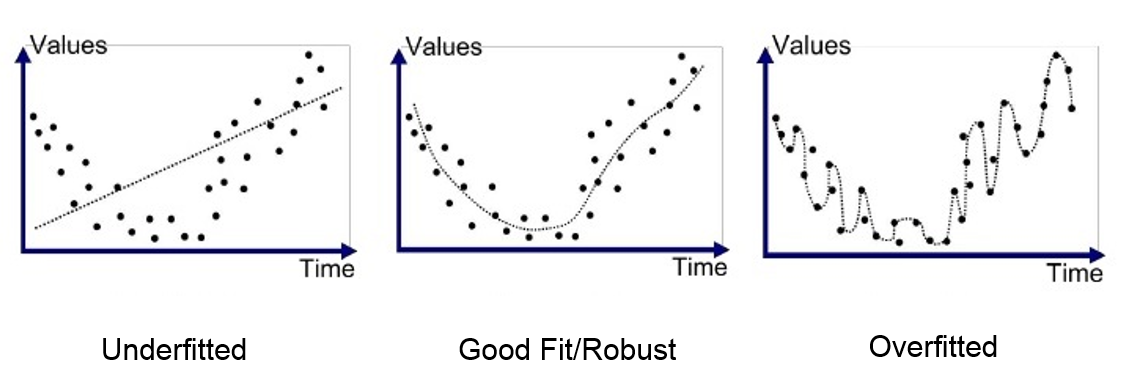

Para el primer conjunto de datos {X_train, y_train},

14. Entrene un **Arbol de Decisión** con el argumento `max_depth`= 1...20. Para cada uno, guarde su coeficiente $R^2$ al predecir el conjunto de entrenamiento, y al predecir el conjunto de prueba.

In [518]:
from sklearn.tree import DecisionTreeRegressor

res = []
depths = range(1, 20)

for md in depths:
    tree = DecisionTreeRegressor(max_depth=md).fit(X_train, y_train)
    tree_pred = tree.predict(X_test)
    res.append(r2_score(y_test, tree_pred))

15. Muestre un gráfico de la evolución de los coeficientes $R^2$ de la parte anterior según la profundidad máxima del árbol de decisión.

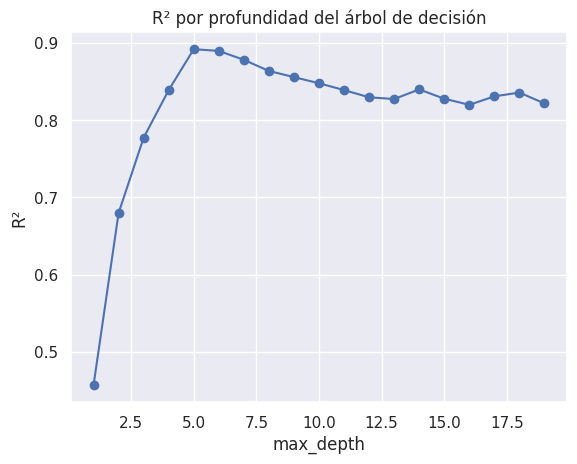

In [519]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
plt.plot(depths, res, marker='o')
plt.title('R² por profundidad del árbol de decisión')
plt.xlabel('max_depth')
plt.ylabel('R²')
plt.show()

## Parte 7: Aumentar el número de características y regularizar una regresión

El objetivo es examinar el impacto de la regularización de los coeficientes de una regresión a medida que aumenta el número de coeficientes. Utilizamos características polinómicas y técnicas de regularización [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) o [Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).

**Regularización**: agregar una penalización al modelo (a la función de entrenamiento) para evitar que aprenda demasiado los datos de entrenamiento.
- Lasso (o L1): se penaliza la suma del valor absoluto de los coeficientes.
- Ridge (o L2): se penaliza la suma de los valores cuadrados de los coeficientes.

16. Genere una tabla donde para cada `degree=1..20`, se guarde:
    * número de coeficientes de $\theta$ (igual al número de columnas de $X$)
    * $R^2$ para cada modelo de regresión
    * norma del vector de coeficientes para cada modelo de regresión
    * cantidad de coeficientes no nulos para cada modelo de regresión

In [520]:
from sklearn.linear_model import Ridge, Lasso
import numpy.linalg as nplin #nplin tiene la funcion norm
import numpy

def coef_non_nuls(coef):
    return sum(numpy.abs(coef) > 0.001)

res = []
degrees = range(1, 21)

for d in degrees:
    line = {}
    res.append(line)
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)

    reg = LinearRegression().fit(X_train_poly, y_train)
    reg_pred = reg.predict(X_test_poly)
    reg_coefs = reg.coef_
    reg_r2 = r2_score(y_test, reg_pred)
    reg_norm = nplin.norm(reg_coefs)
    reg_non_nuls = coef_non_nuls(reg.coef_)

    rid = Ridge(alpha=0.1).fit(X_train_poly, y_train)
    rid_pred = rid.predict(X_test_poly)
    rid_coefs = rid.coef_
    rid_r2 = r2_score(y_test, rid_pred)
    rid_norm = nplin.norm(rid_coefs)
    rid_non_nuls = coef_non_nuls(rid.coef_)

    las = Lasso(alpha=0.1).fit(X_train_poly, y_train)
    las_pred = las.predict(X_test_poly)
    las_coefs = las.coef_
    las_r2 = r2_score(y_test, las_pred)
    las_norm = nplin.norm(las_coefs)
    las_non_nuls = coef_non_nuls(las.coef_)

    line["Grado"] = d
    line["Coeficientes"] = X_train_poly.shape[1]

    line["R^2"] = reg_r2
    line["R^2 Ridge"] = rid_r2
    line["R^2 Lasso"] = las_r2

    line["Norma"] = reg_norm
    line["Norma Ridge"] = rid_norm
    line["Norma Lasso"] = las_norm

    line["No nulos"] = reg_non_nuls
    line["No nulos Ridge"] = rid_non_nuls
    line["No nulos Lasso"] = las_non_nuls

res = pd.DataFrame(res)
res

,Grado,Coeficientes,R^2,R^2 Ridge,R^2 Lasso,Norma,Norma Ridge,Norma Lasso,No nulos,No nulos Ridge,No nulos Lasso
0,1,3,0.913653,0.913550,0.664473,3.583282e+00,3.577176,1.827598,2,2,2
1,2,6,0.929584,0.929604,0.691103,3.528302e+00,3.439661,1.868887,5,5,2
2,3,10,0.929157,0.929576,0.691103,3.397565e+00,3.059240,1.868887,9,9,2
3,4,15,0.929647,0.929533,0.691103,7.668821e+00,3.001916,1.868887,14,14,2
4,5,21,0.930038,0.929457,0.691103,5.336400e+01,2.978147,1.868887,20,20,2
5,6,28,0.930027,0.929381,0.691103,4.692495e+02,2.962775,1.868887,27,27,2
6,7,36,0.927958,0.929333,0.691103,1.817539e+03,2.963998,1.868887,35,35,2
7,8,45,0.927774,0.929319,0.691103,1.237992e+04,2.978359,1.868887,44,42,2
8,9,55,0.923107,0.929334,0.691103,5.548436e+04,3.000712,1.868887,54,54,2
9,10,66,0.922090,0.929371,0.691103,3.342622e+05,3.028670,1.868887,65,65,2


17. Genere un gráfico de $R^2$ de cada modelo (Regresión Lineal, Ridge y Lasso) en función del número de coeficientes, y uno de cantidad de coeficientes no nulos de cada modelo en función del número de coeficientes

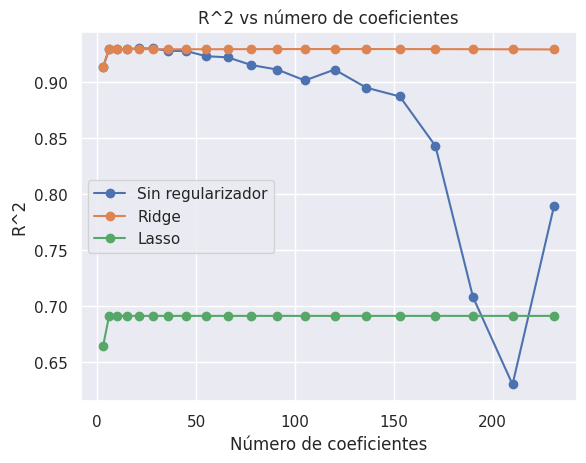

In [521]:
import matplotlib.pyplot as plt
plt.title("R^2 vs número de coeficientes")
plt.plot(res["Coeficientes"], res["R^2"], marker="o", label="Sin regularizador")
plt.plot(res["Coeficientes"], res["R^2 Ridge"], marker="o", label="Ridge")
plt.plot(res["Coeficientes"], res["R^2 Lasso"], marker="o", label="Lasso")
plt.xlabel("Número de coeficientes")
plt.ylabel("R^2")
plt.legend()
plt.show()

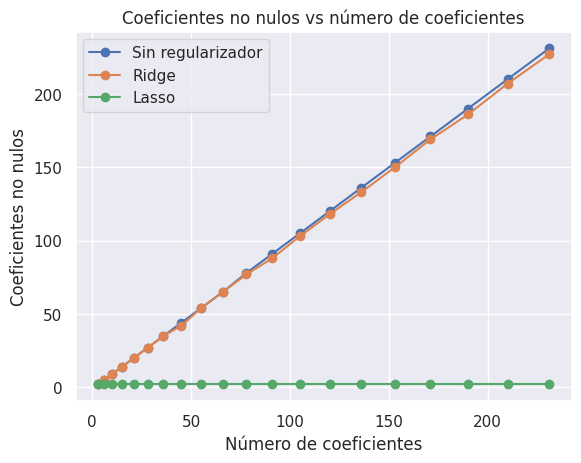

In [522]:
plt.title("Coeficientes no nulos vs número de coeficientes")
plt.plot(res["Coeficientes"], res["No nulos"], marker="o", label="Sin regularizador")
plt.plot(res["Coeficientes"], res["No nulos Ridge"], marker="o", label="Ridge")
plt.plot(res["Coeficientes"], res["No nulos Lasso"], marker="o", label="Lasso")
plt.xlabel("Número de coeficientes")
plt.ylabel("Coeficientes no nulos")
plt.legend()
plt.show()

¿Por qué el desempeño de la regresión lineal cae? ¿Por qué los modelos Ridge y Lasso difieren en la cantidad de coeficientes no nulos?

El desempeño de la regresión lineal cae porque el modelo obtiene mayor libertad para ajustar el polinomio generado a los datos, por lo cual utiliza los coeficientes "de sobra" para ajustarse al ruido (sobreajuste).

Lasso supone que los datos son sparse, es decir, que hay muchos coeficientes nulos en el polinomio. Hace esto minimizando la norma del vector de coeficientes, resultando en muchos coeficientes nulos (prefiriendo los que hacen el polinomio más cercano al objetivo).